The following is from [this article](https://medium.com/towards-data-science/understanding-predictive-maintenance-data-acquisition-and-signal-denoising-0309b1b103a7) in Medium

# Data science of predictive maintanance

Predictive maintenance in data science is like having a super-smart way of taking care of machines. Instead of fixing things after they break, we use fancy computer programs and past data to predict when something might go wrong. It’s a bit like having a crystal ball for machines! By doing this, companies can save money and keep their important machines working longer. This method involves keeping a close eye on machines, collecting data in real-time, and using clever computer programs to tell us when it’s time to do maintenance. So, instead of waiting for something to break, we can fix it before it causes a big problem. It’s like giving machines a health check before they get sick!

# Shannon–Hartley Theorem

The Shannon–Hartley Theorem is like a rulebook for how much information can be sent through a communication channel without getting messed up. It tells us that the width of the channel, or how much data it can handle, is super important. So, before choosing devices or tools to monitor things like machines or sensors, we need to make sure the channel is wide enough to handle all the data we want without losing quality.

To make things even better, we can be smart about how we use the channel. It’s like finding the best way to arrange our data so that we use the channel space most efficiently. This is called optimizing spectral efficiency. So, when picking sensors, we should choose ones that work really well within the available channel space.

# Nyquist Rate

The Nyquist Rate is like a speed limit for how fast we should collect data with our sensors. If we collect data too slowly, we might miss important details about how things are working. So, when we set up systems to keep an eye on things with sensors or smart devices, we need to make sure we’re collecting data at a speed that accurately shows us what’s happening and doesn’t create confusion.

We have to ensure that the sensors are collecting data at a speed that follows the Nyquist Rate. This means collecting data fast enough to capture all the essential details without missing anything important.

fs >= 2 x fmax

Ensure the sensor can measure (fs) at least twice as fast as the fastest change (fmax) in what you’re monitoring. This prevents missing important details and guarantees accurate measurements. Choose a sensor with a speed that matches what you want to measure.

# Aliasing

Imagine you are trying to take a picture of a car moving really fast. However, your camera takes only one picture every second. Now, if the car is moving really, really fast, it might be at a completely different spot by the time you take the next picture. As a result, when you look at the pictures, the car seems to be in weird places because you missed how it moved between each picture. This strange effect where things look different than they actually are is called aliasing.

# Anti-Aliasing

Now, imagine you have a magical camera that can take lots of pictures really quickly. Instead of taking one picture per second, it takes many pictures in that same second, capturing every little detail of the car’s movement. When you look at these pictures, you see a smooth and accurate representation of how the car moved. This process of making sure you capture all the details and avoid the weird effects of aliasing is called anti-aliasing.

In simpler terms, anti-aliasing is like having a super-fast camera to make sure things look as they should without any strange distortions or blurriness. It helps in creating clear and accurate images, especially when things are moving quickly or changing rapidly.

Ok but why it is important in signal processing? These animation will show you how we can use it to denoise the real signal and catch the “core” of these signal.

# Hands on experience

First, we’ll generate a sample signal and set up a plotting function for visualization. In this case, we’ll work with a basic sine wave and experiment with its parameters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_signal(frequency, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)
    return t, signal

In [3]:
def plot_signals(t, original_signal, filtered_signal, title):
    plt.figure(figsize=(10, 6))
    plt.plot(t, original_signal, label="Original Signal", linewidth=2)
    plt.plot(
        t, filtered_signal, label="Filtered Signal", linestyle="dashed", linewidth=2
    )
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

Next we will create example of signal antialliasing using one of the simple filter like Butterworth.

Think of the Butterworth filter as a gatekeeper for different frequencies in our signal. It allows low frequencies to pass through while reducing higher frequencies. Adjusting parameters like filter order and cutoff frequency fine-tunes its selectiveness. This helps us prevent issues like aliasing, ensuring a cleaner signal representation. Let’s see it in action in our code!

In [4]:
from scipy.signal import butter, lfilter

In [5]:
def apply_antialiasing(signal, cutoff_frequency, sampling_rate, order=4):
    # Design a low-pass Butterworth filter (maximal flat magnitute)
    nyquist = 0.5 * sampling_rate
    # Nyquist law in practice
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)

    # Apply the filter to the signal
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

And let`s run an experiment

In [6]:
frequency = 30.0  # Frequency of the signal
duration = 1.0  # Duration of the signal in seconds
sampling_rate = 100.0  # Sampling rate in Hz
cutoff_frequency = 20.0  # Cutoff frequency of the anti-aliasing filter

In [7]:
# Generate a signal
t, original_signal = generate_signal(frequency, duration, sampling_rate)

In [8]:
# Apply anti-aliasing filter
filtered_signal = apply_antialiasing(original_signal, cutoff_frequency, sampling_rate)

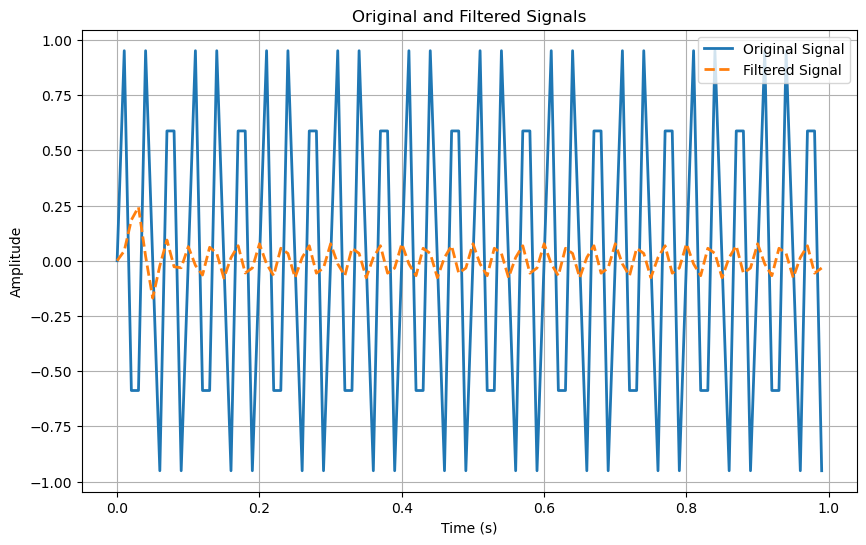

In [9]:
# Plot the original and filtered signals
plot_signals(t, original_signal, filtered_signal, "Original and Filtered Signals")

When it comes to sampling, our pure sine wave doesn’t look as “beautiful” as we might expect. Some parts are cut off, and this is because of the sampling process.

I encourage you to replicate this code and experiment with the parameters. It’s a lot of fun!

We can also play with different types of filters.

In [10]:
from scipy.signal import butter, cheby1, cheby2, ellip, lfilter

In [11]:
def apply_filter(
    signal, cutoff_frequency, sampling_rate, filter_type="butter", order=4
):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist

    if filter_type == "butter":
        b, a = butter(order, normal_cutoff, btype="low", analog=False)
    elif filter_type == "cheby1":
        b, a = cheby1(order, 5, normal_cutoff, btype="low", analog=False)
    elif filter_type == "cheby2":
        b, a = cheby2(order, 40, normal_cutoff, btype="low", analog=False)
    elif filter_type == "ellip":
        b, a = ellip(order, 5, 40, normal_cutoff, btype="low", analog=False)

    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

We will modify our plot function a little to gather all the results in one plot.

In [12]:
def plot_signals_subplots(t, original_signal, filtered_signals, titles):
    num_filters = len(filtered_signals)

    fig, axes = plt.subplots(num_filters + 1, 1, figsize=(12, 2 * (num_filters + 1)))

    # Plot original signal
    axes[0].plot(t, original_signal, label="Original Signal", linewidth=2, alpha=0.7)
    axes[0].set_title("Original Signal")
    axes[0].set_xlabel("Time (s)")
    axes[0].set_ylabel("Amplitude")
    axes[0].legend()
    axes[0].grid(True)

    # Plot filtered signals
    for i, (filtered_signal, filter_type) in enumerate(
        zip(filtered_signals, filter_types)
    ):
        label = f"Filtered Signal ({filter_type})"
        axes[i + 1].plot(
            t, filtered_signal, label=label, linestyle="dashed", linewidth=2
        )
        axes[i + 1].set_title(f"Filtered Signal ({filter_type})")
        axes[i + 1].set_xlabel("Time (s)")
        axes[i + 1].set_ylabel("Amplitude")
        axes[i + 1].legend()
        axes[i + 1].grid(True)

    plt.tight_layout()
    plt.show()

In [13]:
# Generate a signal (exactly the same as previous)
t, original_signal = generate_signal(frequency, duration, sampling_rate)

In [14]:
# Apply different filters
filter_types = ["butter", "cheby1", "cheby2", "ellip"]
filtered_signals = [
    apply_filter(original_signal, cutoff_frequency, sampling_rate, f)
    for f in filter_types
]

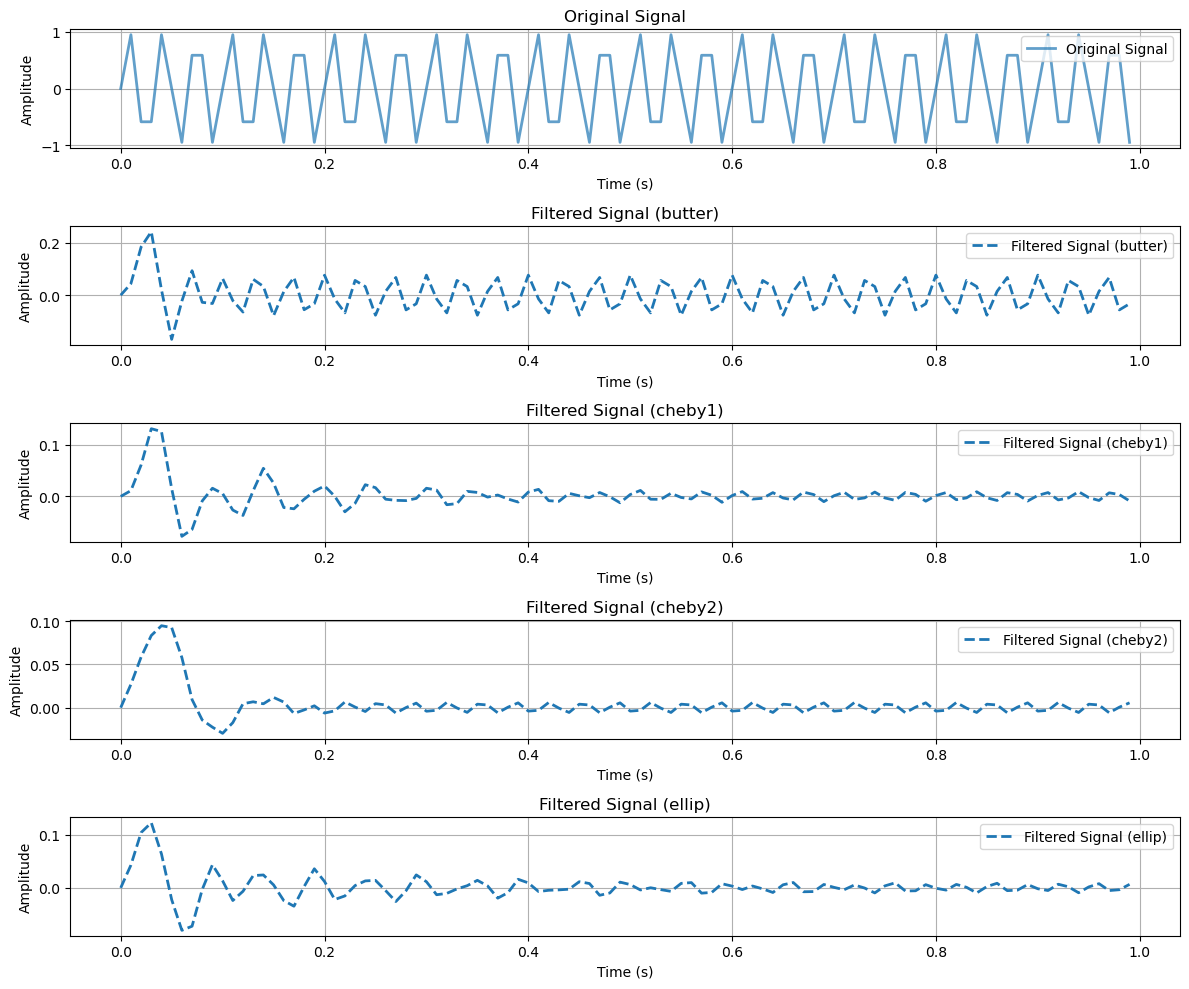

In [15]:
# Plot the original and filtered signals
plot_signals_subplots(
    t, original_signal, filtered_signals, "Original and Filtered Signals"
)

In the beautiful pure sine wave, certain effects might not be clearly visible. Let’s introduce some noise.

In [16]:
def generate_signal_with_noise(frequency, duration, sampling_rate, noise_amplitude=0.1):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)

    # Add noise to the signal
    noise = noise_amplitude * np.random.normal(size=len(signal))
    signal_with_noise = signal + noise

    return t, signal_with_noise

And run the experiment one more time.

In [17]:
# Generate a noisy signal
t, original_signal = generate_signal(frequency, duration, sampling_rate)
t, original_signal_with_noise = generate_signal_with_noise(
    frequency, duration, sampling_rate, noise_amplitude=0.8
)

In [18]:
# Apply different filters
filter_types = ["butter", "cheby1", "cheby2", "ellip"]
filtered_signals = [
    apply_filter(original_signal_with_noise, cutoff_frequency, sampling_rate, f)
    for f in filter_types
]

Now, we can observe the power of denoising and understand how various filters work.

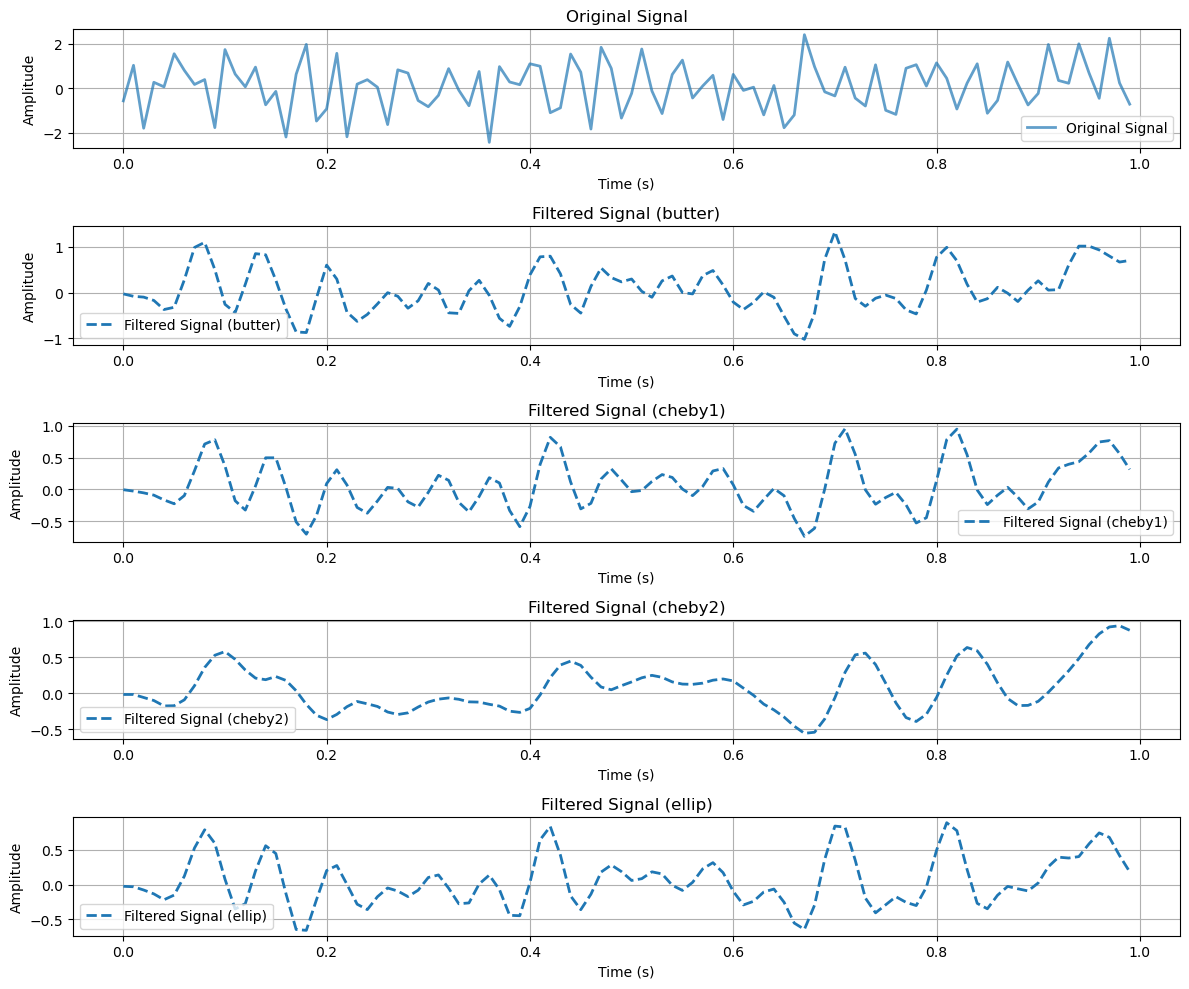

In [19]:
# Plot the original and filtered signals
plot_signals_subplots(
    t, original_signal_with_noise, filtered_signals, "Original and Filtered Signals"
)

In this experiment, we precisely identify the function we generated (a pure sine wave). While investigating the actual data, we aim to determine the function describing our phenomenon, such as failure signals or continuously increasing equipment wear. Noise will always be present in our data, and understanding how to handle it is crucial.

# Seasonal decomposition

Seasonal decomposition is a powerful technique used in signal processing to understand the different components of a signal and investigate its seasonal patterns. Signals, in this context, can represent various phenomena, such as economic data, environmental variables, or even electrical signals. The goal of seasonal decomposition is to break down a complex signal into its fundamental parts, making it easier to analyze and interpret.

A signal typically consists of three main components: the trend, the seasonal component, and the residual (or noise). The trend represents the long-term behavior or overall pattern of the signal, the seasonal component captures repetitive patterns that occur at regular intervals, and the residual is the leftover variation or noise that cannot be explained by the trend or seasonality.

By decomposing a signal into these components, analysts can gain insights into the underlying patterns and trends, helping them make more informed decisions. This process is particularly valuable in fields such as finance, climate science, and manufacturing, where understanding seasonal variations is crucial for accurate forecasting and effective decision-making.

In this exploration of seasonal decomposition, we’ll delve into the methodology of breaking down signals, examining each component individually, and learning how to investigate and interpret the insights gained from this analytical approach.

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
# Generate a signal with noise
t, original_signal_with_noise = generate_signal_with_noise(
    frequency, duration, sampling_rate, noise_amplitude=0.8
)

In [22]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(
    original_signal_with_noise, period=25
)  # Adjust the period as needed

In [23]:
# Get the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

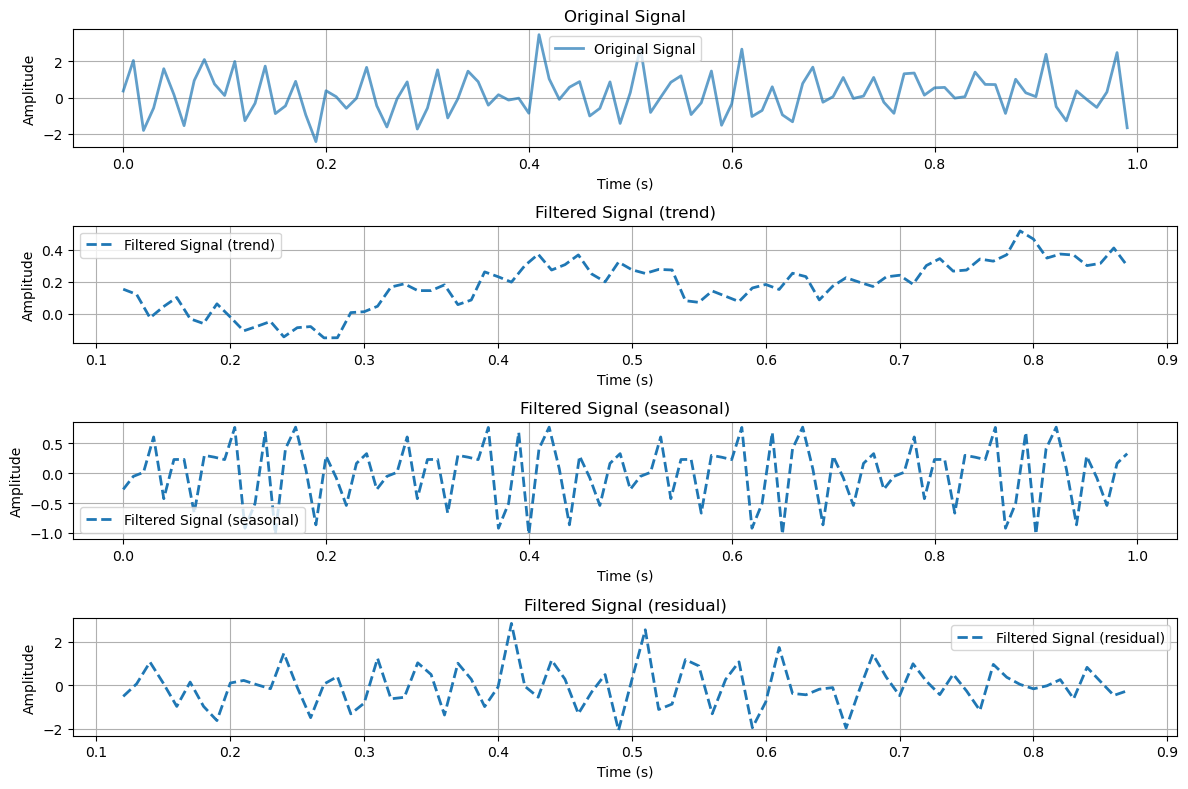

In [24]:
# Plot signals in separate subplots
filter_types = ["trend", "seasonal", "residual"]
plot_signals_subplots(
    t,
    original_signal_with_noise,
    [trend, seasonal, residual],
    "Original Signal with Noise and Decomposed Components",
)

Make our sine wave more interesting by adding cool signals. I’ll tweak the signal generation to imitate equipment wear and tear, picturing it like parts of a machine gradually wearing down over time. This might result in more vibrations due to increased friction.

In [25]:
def generate_signal_with_wear_and_noise(
    frequency, duration, sampling_rate, wear_slope=0.02, noise_amplitude=0.1
):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)

    # Simulate equipment wearing with a linear trend
    wear = wear_slope * t
    signal_with_wear = signal + wear

    # Add noise to the signal
    noise = noise_amplitude * np.random.normal(size=len(signal))
    signal_with_wear_and_noise = signal_with_wear + noise

    return t, signal_with_wear_and_noise

Start the experiment.

In [26]:
# Generate a signal with equipment wearing and noise
t, original_signal_with_wear_and_noise = generate_signal_with_wear_and_noise(
    frequency, duration, sampling_rate, wear_slope=0.5, noise_amplitude=0.1
)

In [27]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(
    original_signal_with_wear_and_noise, period=25
)  # Adjust the period as needed

In [28]:
# Get the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

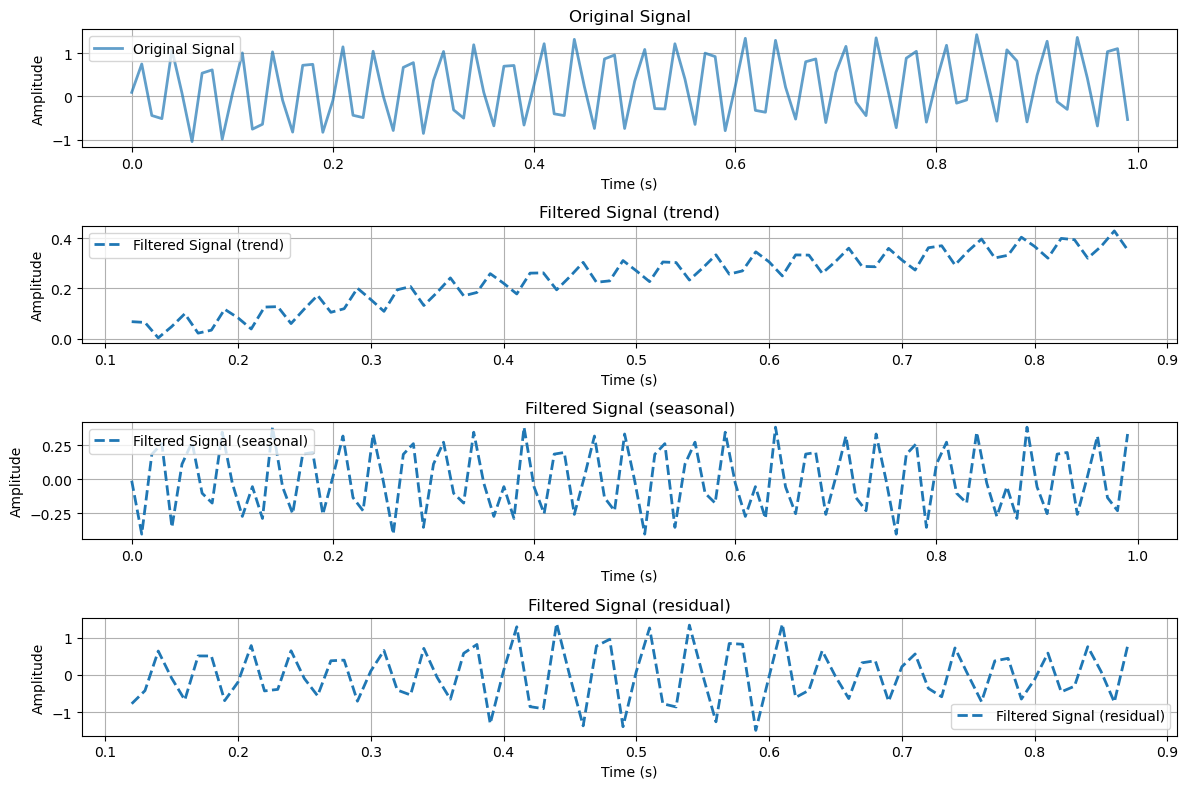

In [29]:
# Plot signals in separate subplots with component names
filter_types = ["trend", "seasonal", "residual"]
plot_signals_subplots(
    t,
    original_signal_with_wear_and_noise,
    [trend, seasonal, residual],
    "Signal with Wearing and Noise, and Decomposed Components",
)

Wow! In our original noisy signal, we couldn’t find anything. However, after breaking it down into parts, we discovered the trend component, which is now clearly visible. This is a sign.